# Research Topic: Comparing Amateur Built and Purpose of Flight

In this notebook, we will be researching the the relationship between the *Purpose of Flight* and *Amateur Built* fields to see if there is any correlation.

**Hypothesis:** Aircraft that are Amateur Built have more fatalities on average than non-Amateur Built

## Data Grouping

First, we will import our necessary libraries and data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/AviationData_clean.csv', index_col=0)

df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Registration.Number,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Location_City,Location_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NC6404,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,N5069P,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,N5142R,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,N1168J,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Eureka,CA
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Substantial,CF-TLU,Mcdonnell Douglas,DC9,...,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Boston,MA


Now, let's sort the dataframe by the Amateur Built and Purpose of Flight fields, excluding any that have an unknown flight purpose:

In [22]:
amateur_built_df = df[(df['Purpose.of.flight'] != 'Unknown')]
amateur_built_df_gb = amateur_built_df.groupby(['Amateur.Built', 'Purpose.of.flight'])
amateur_built_df_gb['Event.Id'].count().sort_values(ascending=False).head(10)

Amateur.Built  Purpose.of.flight 
No             Personal              40023
               Instructional          9893
Yes            Personal               7109
No             Aerial Application     4549
               Business               3763
               Positioning            1547
               Other Work Use         1106
               Ferry                   747
               Aerial Observation      699
               Public Aircraft         680
Name: Event.Id, dtype: int64

Here, we can see that the predominant category is Personal, non-amateur built flights (Commercial Airline flights)

To get a better idea of the number of fatalities, let's sort the grouped data frame.

In [23]:
amateur_built_df_gb[['Total.Fatal.Injuries']].mean().sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

Total.Fatal.Injuries
Amateur.Built Purpose.of.flight                        
No            Skydiving                        1.309942
Yes           Public Aircraft                  1.055556
No            Executive/corporate              0.812865
Yes           Air Race/show                    0.789474
              Business                         0.718750
No            Air Race/show                    0.655172
Yes           Executive/corporate              0.600000
No            Business                         0.537869
              Air Race show                    0.468085
              Aerial Observation               0.467811

It seems that, on average, the flights with the highest fatality rate are skydiving outings in professionally built aircraft.

Let's also look at the serious and minor injury rates:

In [24]:
amateur_built_df_gb[['Total.Serious.Injuries']].mean().sort_values(by='Total.Serious.Injuries', ascending=False).head(10)

Total.Serious.Injuries
Amateur.Built Purpose.of.flight                              
Yes           Aerial Observation                     1.500000
              ASHO                                   1.000000
No            Public Aircraft - Local                0.676056
              Air Drop                               0.500000
              Skydiving                              0.491228
Yes           Air Race/show                          0.368421
No            Aerial Observation                     0.356223
              Public Aircraft - State                0.333333
Yes           Public Aircraft                        0.333333
No            Banner Tow                             0.326316

In [25]:
amateur_built_df_gb[['Total.Minor.Injuries']].mean().sort_values(by='Total.Minor.Injuries', ascending=False).head(10)

Total.Minor.Injuries
Amateur.Built Purpose.of.flight                              
Yes           Executive/corporate                    0.800000
              Public Aircraft                        0.500000
No            Public Aircraft - State                0.412698
              Other Work Use                         0.399638
              Aerial Observation                     0.371960
              Executive/corporate                    0.352827
              Public Aircraft                        0.338235
              Public Aircraft - Federal              0.311828
Yes           Instructional                          0.305556
No            Firefighting                           0.291667

From these results, it seems as if Amateur Built planes have a higher count of serious and minor injuries.

## Visualization

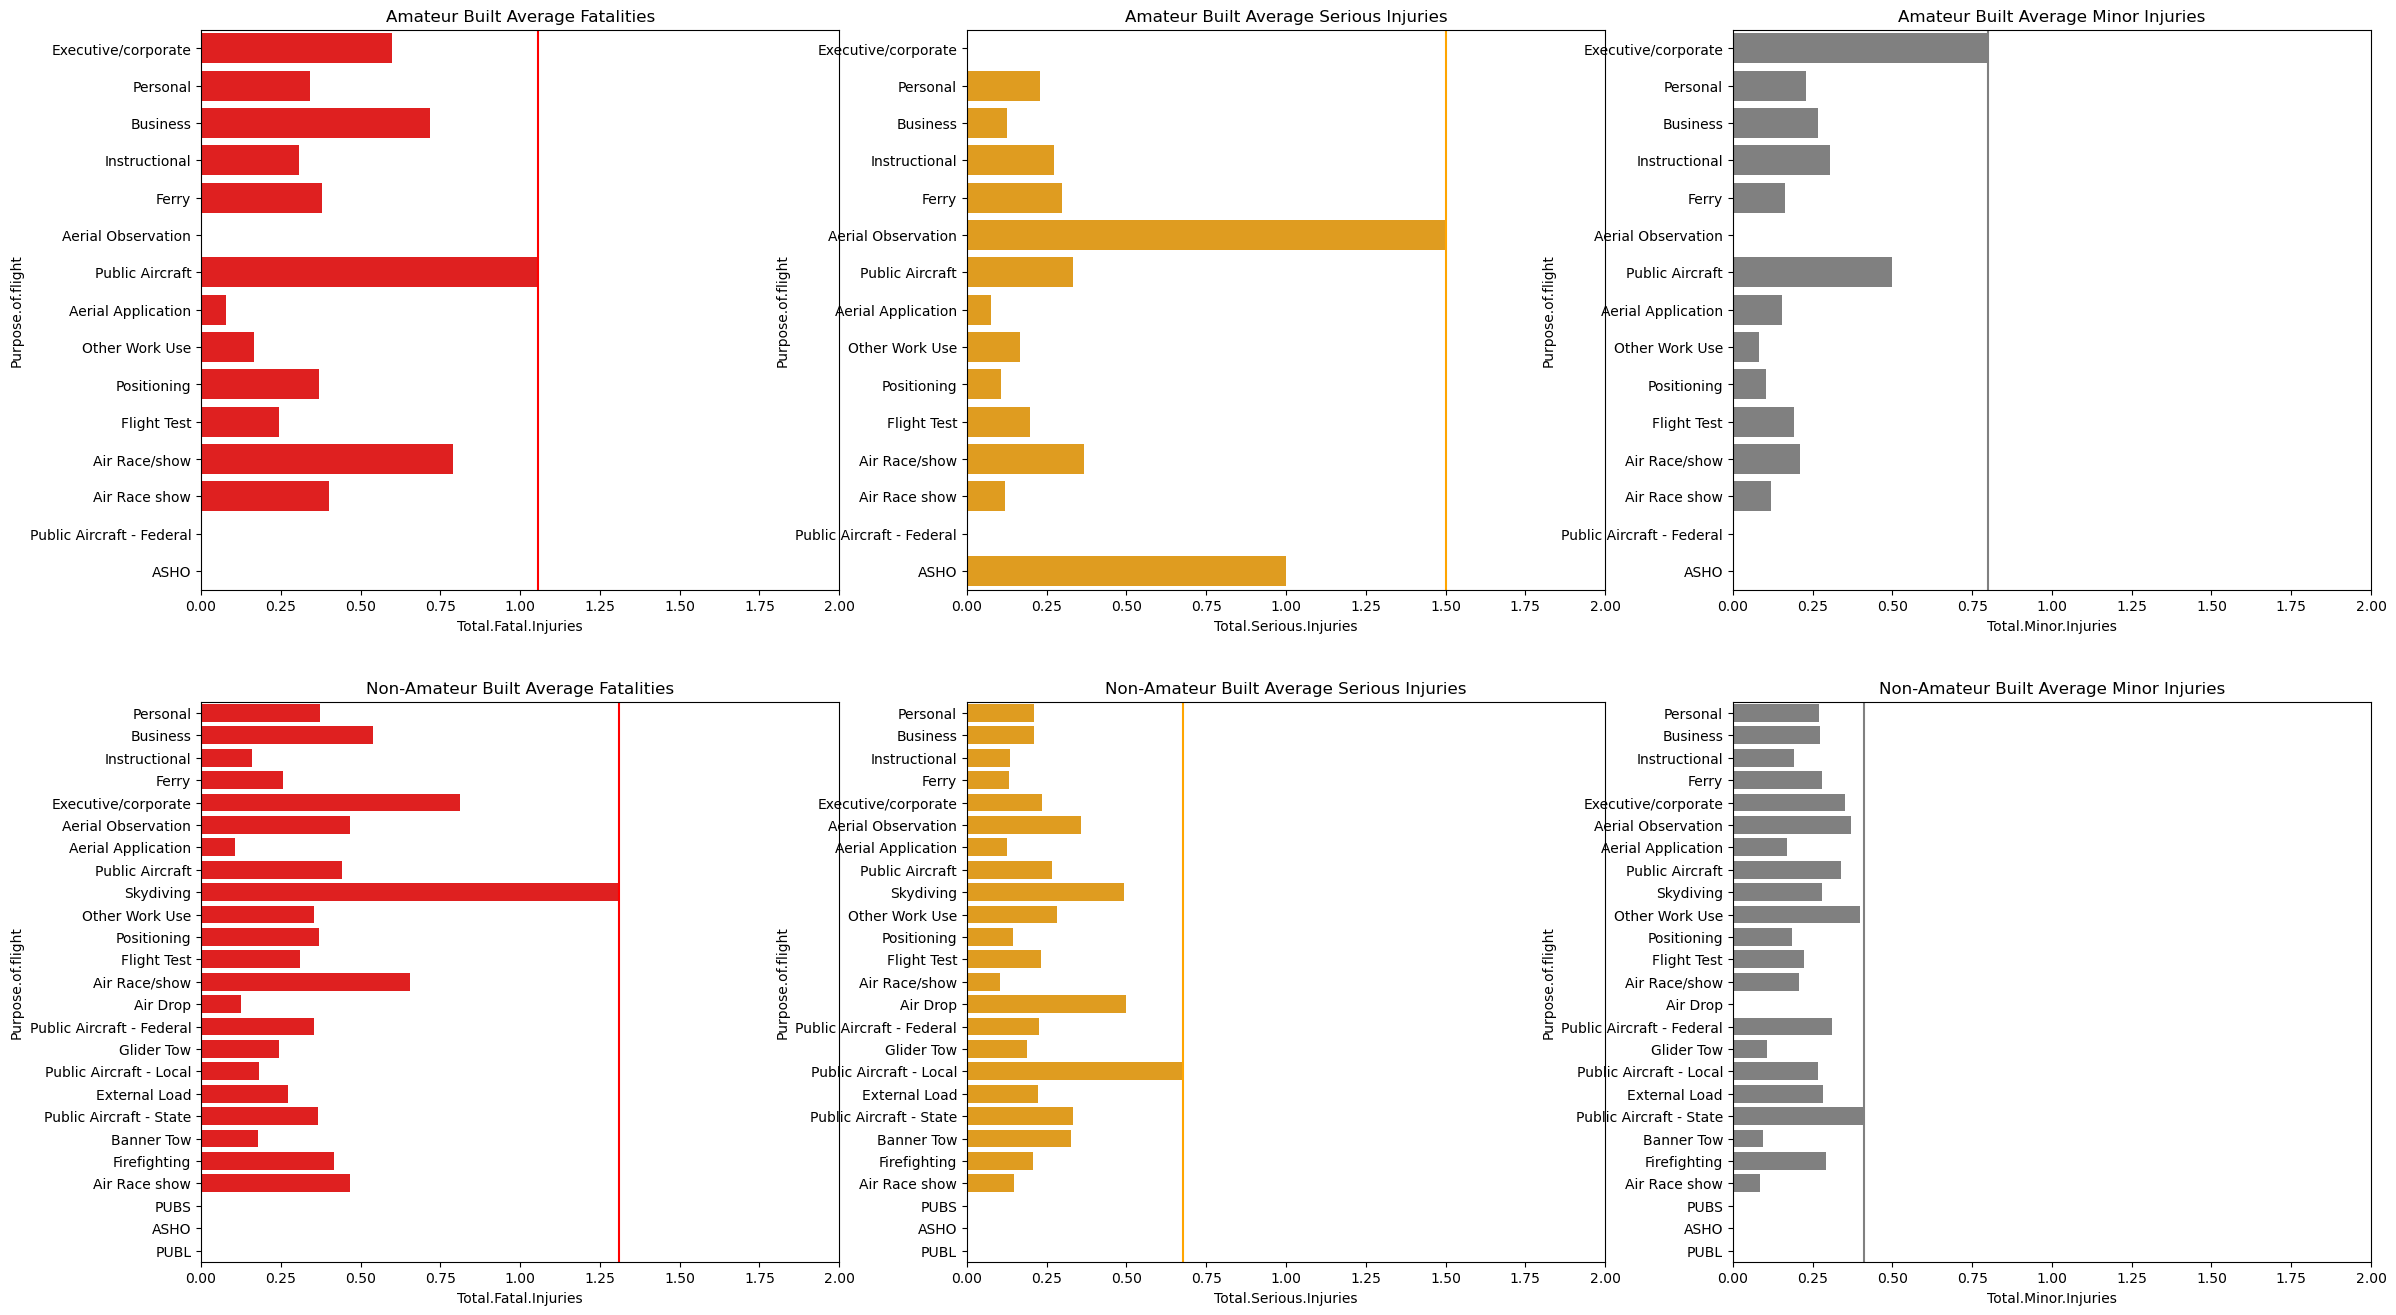

In [73]:
amateur_f_df = amateur_built_df[amateur_built_df['Amateur.Built'] == 'Yes']
non_amateur_f_df = amateur_built_df[amateur_built_df['Amateur.Built'] == 'No']

fig, ax = plt.subplots(2,3, figsize=(28, 16))

ax[0][0].set_title('Amateur Built Average Fatalities')
ax[0][0].set_xlim(0,2)

ax[1][0].set_title('Non-Amateur Built Average Fatalities')
ax[1][0].set_xlim(0,2)

sns.barplot(data=amateur_f_df, x='Total.Fatal.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='red', ax=ax[0][0])
sns.barplot(data=non_amateur_f_df, x='Total.Fatal.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='red', ax=ax[1][0])

ax[0][0].axvline(x=1.055556, color='r')
ax[1][0].axvline(x=1.309942, color='r')

ax[0][1].set_title('Amateur Built Average Serious Injuries')
ax[0][1].set_xlim(0,2)

ax[1][1].set_title('Non-Amateur Built Average Serious Injuries')
ax[1][1].set_xlim(0,2)

sns.barplot(data=amateur_f_df, x='Total.Serious.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='orange', ax=ax[0][1])
sns.barplot(data=non_amateur_f_df, x='Total.Serious.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='orange', ax=ax[1][1])

ax[0][1].axvline(x=1.500000, color='orange')
ax[1][1].axvline(x=0.676056, color='orange')

ax[0][2].set_title('Amateur Built Average Minor Injuries')
ax[0][2].set_xlim(0,2)

ax[1][2].set_title('Non-Amateur Built Average Minor Injuries')
ax[1][2].set_xlim(0,2)

sns.barplot(data=amateur_f_df, x='Total.Minor.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='grey', ax=ax[0][2])
sns.barplot(data=non_amateur_f_df, x='Total.Minor.Injuries', y='Purpose.of.flight', orient='h', errorbar=None, estimator='mean', color='grey', ax=ax[1][2])

ax[0][2].axvline(x=0.800000, color='grey')
ax[1][2].axvline(x=0.412698, color='grey')

plt.show()

## Conclusion

In conclusion, accidents involving Amateur Built aircraft have a higher average non-fatal injury count, but a lower average fatality count.

In [84]:
mean_gb = amateur_f_df.groupby(['Make'])['Total.Fatal.Injuries'].mean().sort_values(ascending=False)
mean_gb.loc[mean_gb.values == 0].sample(10)

Make
Birdman Enterprises, Inc.    0.0
Elves                        0.0
Hawkins William              0.0
Donald E. Samuels            0.0
Amirkhanian Shahram Charl    0.0
Schell                       0.0
Patin                        0.0
Shpakow Thomas               0.0
Morrison Joseph              0.0
John S. Eberle               0.0
Name: Total.Fatal.Injuries, dtype: float64

Based on this data, I would recommend to our business to use an amateur built aircraft that has an average fatality count of 0. A random selection of manufacturers can be seen above.